## LDA Topic Modeling 2
### Application : News Article Recommendation System

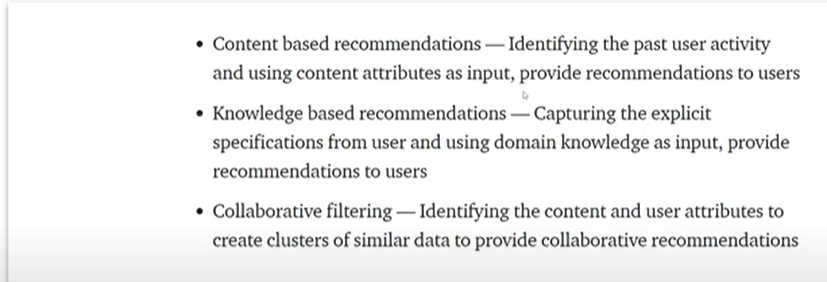

## Data - 20 Newsgroups

In [2]:
!pip install ktrain

In [5]:
ktrain.__version__

'0.26.2'

In [6]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ktrain
from sklearn.datasets import fetch_20newsgroups

### Unsupervisd modelling 

So, train + test = used data

In [8]:
remove = ('header', 'footer', 'quotes')
train = fetch_20newsgroups(subset='train', remove=remove)
test = fetch_20newsgroups(subset='test', remove=remove)

texts = train.data + test.data

### Data Preprocessing

In [9]:
%%time
tm = ktrain.text.get_topic_model(texts, n_features=1000)

n_topics automatically set to 97
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
CPU times: user 2min 18s, sys: 1min 47s, total: 4min 5s
Wall time: 1min 9s


### Thresholding

In [10]:
tm.build(texts, threshold=0.25)

done.


### Train model

In [11]:
tm.train_recommender()

### Test the model recommendeation system

In [14]:
rawtext = """When Berkshire Hathaway Inc. started trimming its stake in BYD Co., theories swirled about the prospects for China’s largest electric-vehicle maker. Turns out, it’s less about the company and more about Warren Buffett being Warren Buffett.

Berkshire has begun shedding BYD stock, dragging down the firm’s shares as traders feared an exit by its most notable backer. For BYD, with profit that just tripled and a nearly 30% share in China’s expanding electric-car manufacturing market."""

In [16]:
# tm.recommend(text=rawtext, n=5)

In [19]:
for i, doc in enumerate(tm.recommend(text=rawtext, n=5)):
    print('Result #%s'% (i+1))
    print('Text \n')
    
    ## show first 400 words
    print(" ".join(doc['text'].split()[:400]))
    print()


Result #1
Text 

From: jayne@mmalt.guild.org (Jayne Kulikauskas) Subject: Re: technology Organization: Kulikauskas home Lines: 28 Well said, Michael! The Catholic traditon has a list of behaviours called the Spiritual Works of Mercy: admonish the sinner instruct the ignorant counsel the doubtful comfort the sorrowful bear wrongs patiently forgive all injury pray for the living and the dead (yes, I know there is some controversy on this and I don't want to argue about it.) These are all things that have a direct application to usenet. People ask questions and express doubts. Some are in need of comfort or prayers. Imagine what would happen to flame wars if we bore wrongs patiently and forgave injuries. I would add that it is probably more appropriate to do any admonishing by private email than publicly. Jayne Kulikauskas/ jayne@mmalt.guild.org

Result #2
Text 

From: parys@ccsua.ctstateu.edu Subject: Re: A Message for you Mr. President: How do you know what happened? Keywords: Success L